# Qatar

This project uses:
    * a hyperspectral image of Qatar, and Bahrein 
    * tests the Optical Flow as a mean to correct for interband & intraband misaligments.


In [1]:
set_id="5996f4d56abf47ca99790a1586c00a09"

In [2]:
#add utils functions
import sys
sys.path.insert(0, '../')

# Get the data

In [5]:
#Test data is available, download if not
data_dir="../data/satellogic/macro/"

import telluric_util
import importlib
importlib.reload(telluric_util)

import os
    
#get token for auth
token=telluric_util.get_token('stanfordhackathon','hack2018')
#get scene_id from set_id
scene_id=telluric_util.set2id(set_id,token)

if not os.path.exists(data_dir+"/"+set_id):
    #download what doesn't exist for given scene_id
    telluric_util.download_scene(set_id,token,data_dir)

# Visualize

In [6]:
import os
from glob import glob

hypercube_folder = data_dir+set_id+"/"+scene_id+"/rasters/"
print(hypercube_folder)
files = [os.path.basename(fname) for fname in glob(hypercube_folder + "*.tif")]

rgb_file = [x for x in files if 'rgb_enhanced' in x][0]
hfiles = sorted(x for x in files if x[-6:] == 'nm.tif')

print("RGB file: %s. Number of Spectral bands: %i" % (rgb_file, len(hfiles)))
print(hfiles)

../data/satellogic/macro/5996f4d56abf47ca99790a1586c00a09/newsat3_macro_cube_5996f4d56abf47ca99790a1586c00a09_0_3_48/rasters/
RGB file: rgb_enhanced.tif. Number of Spectral bands: 30
['HyperCube_452_nm.tif', 'HyperCube_462_nm.tif', 'HyperCube_475_nm.tif', 'HyperCube_488_nm.tif', 'HyperCube_502_nm.tif', 'HyperCube_516_nm.tif', 'HyperCube_530_nm.tif', 'HyperCube_550_nm.tif', 'HyperCube_570_nm.tif', 'HyperCube_582_nm.tif', 'HyperCube_595_nm.tif', 'HyperCube_608_nm.tif', 'HyperCube_616_nm.tif', 'HyperCube_670_nm.tif', 'HyperCube_680_nm.tif', 'HyperCube_690_nm.tif', 'HyperCube_700_nm.tif', 'HyperCube_710_nm.tif', 'HyperCube_720_nm.tif', 'HyperCube_730_nm.tif', 'HyperCube_740_nm.tif', 'HyperCube_750_nm.tif', 'HyperCube_760_nm.tif', 'HyperCube_770_nm.tif', 'HyperCube_780_nm.tif', 'HyperCube_790_nm.tif', 'HyperCube_800_nm.tif', 'HyperCube_810_nm.tif', 'HyperCube_820_nm.tif', 'HyperCube_827_nm.tif']


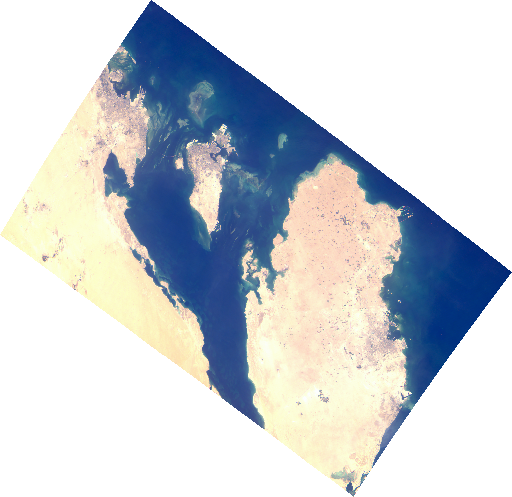

In [7]:
import telluric as tl

path = hypercube_folder + rgb_file

rgb = tl.GeoRaster2.open(path)
rgb

In [22]:
from telluric.georaster import merge_all
roi = tl.FileCollection.open(hypercube_folder + rgb_file).envelope

print("Reading files...", end='')

bands = []
for band in hfiles:
    print(band, end=", ")
    rs = tl.GeoRaster2.open(hypercube_folder + band)
    bands.append(rs)
print("")

FionaValueError: No dataset found at path '../data/satellogic/macro/5996f4d56abf47ca99790a1586c00a09/newsat3_macro_cube_5996f4d56abf47ca99790a1586c00a09_0_3_48/rasters/rgb_enhanced.tif' using drivers: *